In [65]:
from numpy import *
from pylab import*
from random import *
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [66]:
# 2D CA for epidemic data
# CA = {D, N, S, f}
Nr = 100; Nc = 100; T =150
recovery = 7
N = Nr * Nc  # total number of cells in my community
s = zeros((Nr,Nc))  # status (0 - healthy, 1 - infected, 2 - recovered)
R = zeros((Nr,Nc))

# social distancing
sd = 0.5

Sc = zeros(T)
Ic = zeros(T)
Cc = zeros(T)
Rc = zeros(T)

for i in range(10):
    x = randint(1,Nc-1)
    y = randint(1,Nr-1)
    s[x,y] = 1
    R[x,y] = 1
Ic[0] = 10
Sc[0] = N - Ic[0]
Rc[0] = 0
Cc[0] = 10
    
    
D = zeros((Nr,Nc))

In [67]:
imshow(s)

In [13]:
for t in range(1,T):
    for i in range(Nr):
        for j in range(Nc):
            D[i,j] = s[i,j]
            

    new_infection = 0       
    for i in range(1,Nc-1):
        for j in range(1,Nr-1):
# we apply rules for Moore neighbors
            if s[i,j] == 0:
                num_inf = 0
                for n in [s[i-1,j-1], s[i,j-1], s[i+1,j-1], s[i-1,j], s[i+1,j], s[i-1,j+1], s[i,j+1], s[i+1,j+1]]:
                    if n == 1:
                        num_inf += 1
                p = float(num_inf)/4
                p = p * sd
                tmp = rand()
                if tmp <= p :
                    D[i,j] = 1
                    R[i,j] = 1
                    new_infection += 1
            if s[i,j] == 1:
                R[i,j] += 1
                R[i,j] = min(recovery,R[i,j])
            if R[i,j] == recovery:
                D[i,j] = 2
                
    Cc[t] = Cc[t-1] + new_infection           
    for i in range(Nr):
        for j in range(Nc):
            s[i,j] = D[i,j]
            st = s[i,j]
            if st == 0:
                Sc[t] += 1
            elif st == 1:
                Ic[t] += 1
            elif st == 2:
                Rc[t] += 1
                
    clf()
    imshow(s, vmin = 0, vmax = 2)
    pause(0.1)

In [14]:
print(Cc[149])

9599.0


In [ ]:
# Moore neighbors 와 von Neumann neighbors의 가장 큰 차이점은 대각선에 있는 사람을 
# neighbor라고 결정하는지의 여부이다. Moore 모델은 대각선에 있는 사람도 neighbor라고
# 정의하므로 von Nuemann 모델보다 확산속도가 빠르다.
#그러나 그 외에 감염확률이나 완치기간등의 parameter는 같으므로 두 모델은 
# neighbor의 정의만 다른 거의 비슷한 모델이라고 볼 수 있다.

In [81]:
sd = 0
a = zeros(15)
b = zeros(15)
for i in range(15):
    b[i] = (i+1)*0.05

In [82]:
%matplotlib inline

In [83]:
for k in range(1,16):
    sd = sd + 0.05
    # 2D CA for epidemic data
    # CA = {D, N, S, f}
    Nr = 100; Nc = 100; T =150
    recovery = 7
    N = Nr * Nc  # total number of cells in my community
    s = zeros((Nr,Nc))  # status (0 - healthy, 1 - infected, 2 - recovered)
    R = zeros((Nr,Nc))


    Sc = zeros(T)
    Ic = zeros(T)
    Cc = zeros(T)
    Rc = zeros(T)

    #감염자가 랜덤하게 10명
    for i in range(10):
        x = randint(1,Nc-1)
        y = randint(1,Nr-1)
        s[x,y] = 1
        R[x,y] = 1
    Ic[0] = 10
    Sc[0] = N - Ic[0]
    Rc[0] = 0
    Cc[0] = 10
  
    D = zeros((Nr,Nc))
    for t in range(1,T):
        for i in range(Nr):
            for j in range(Nc):
                D[i,j] = s[i,j]


        new_infection = 0       
        for i in range(1,Nc-1):
            for j in range(1,Nr-1):
    # we apply rules for von neumann neighbors
                if s[i,j] == 0:
                    num_inf = 0
                    for n in [s[i-1,j], s[i+1,j], s[i,j+1], s[i,j-1]]:
                        if n == 1:
                            num_inf += 1
                    p = float(num_inf)/4
                    p = p * sd
                    tmp = rand()
                    if tmp <= p :
                        D[i,j] = 1
                        R[i,j] = 1
                        new_infection += 1
                if s[i,j] == 1:
                    R[i,j] += 1
                    R[i,j] = min(recovery,R[i,j])
                if R[i,j] == recovery:
                    D[i,j] = 2

        Cc[t] = Cc[t-1] + new_infection           
        for i in range(Nr):
            for j in range(Nc):
                s[i,j] = D[i,j]
                st = s[i,j]
                if st == 0:
                    Sc[t] += 1
                elif st == 1:
                    Ic[t] += 1
                elif st == 2:
                    Rc[t] += 1

    print(Cc[149])
    a[k-1] = Cc[149]

14.0
24.0
23.0
64.0
107.0
163.0
632.0
1040.0
4593.0
7078.0
8559.0
9249.0
9393.0
8930.0
9546.0


Text(0, 0.5, 'cumulative infected population')

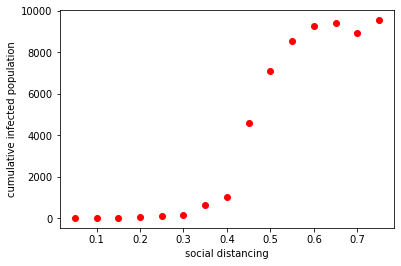

In [89]:
plot(b,a,'ro')
xlabel('social distancing')
ylabel('cumulative infected population')

In [ ]:
# x축은 social distancing(값이 커질수록 사회적 거리를 적게 둠), y축은 cumulative infected population이다.
# 그래프는 social distancing이 0.05로 시작하여 0.05씩 늘어나는 그래프이며, 마지막 값은 0.75이다.
#linear하진 않지만 대체적으로 social distancing이 작아질수록-사회적으로 거리를 많이 둘수록- 전체 감염자가 줄어드는 경향을 보인다.

In [87]:
c = zeros(15)
b = zeros(15)
for i in range(15):
    b[i] = (i+1)*0.05

In [88]:
for k in range(1,16):
    sd = 0.5
    # 2D CA for epidemic data
    # CA = {D, N, S, f}
    Nr = 100; Nc = 100; T =150
    recovery = 7
    N = Nr * Nc  # total number of cells in my community
    s = zeros((Nr,Nc))  # status (0 - healthy, 1 - infected, 2 - recovered)
    R = zeros((Nr,Nc))


    Sc = zeros(T)
    Ic = zeros(T)
    Cc = zeros(T)
    Rc = zeros(T)

    
    for i in range(k):
        x = randint(1,Nc-1)
        y = randint(1,Nr-1)
        s[x,y] = 1
        R[x,y] = 1
    Ic[0] = 10
    Sc[0] = N - Ic[0]
    Rc[0] = 0
    Cc[0] = 10
  
    D = zeros((Nr,Nc))
    for t in range(1,T):
        for i in range(Nr):
            for j in range(Nc):
                D[i,j] = s[i,j]


        new_infection = 0       
        for i in range(1,Nc-1):
            for j in range(1,Nr-1):
    # we apply rules for von neumann neighbors
                if s[i,j] == 0:
                    num_inf = 0
                    for n in [s[i-1,j], s[i+1,j], s[i,j+1], s[i,j-1]]:
                        if n == 1:
                            num_inf += 1
                    p = float(num_inf)/4
                    p = p * sd
                    tmp = rand()
                    if tmp <= p :
                        D[i,j] = 1
                        R[i,j] = 1
                        new_infection += 1
                if s[i,j] == 1:
                    R[i,j] += 1
                    R[i,j] = min(recovery,R[i,j])
                if R[i,j] == recovery:
                    D[i,j] = 2

        Cc[t] = Cc[t-1] + new_infection           
        for i in range(Nr):
            for j in range(Nc):
                s[i,j] = D[i,j]
                st = s[i,j]
                if st == 0:
                    Sc[t] += 1
                elif st == 1:
                    Ic[t] += 1
                elif st == 2:
                    Rc[t] += 1

    print(Cc[149])
    c[k-1] = Cc[149]

2013.0
2562.0
3862.0
4980.0
5205.0
6052.0
6208.0
5953.0
5929.0
6342.0
7810.0
7214.0
7624.0
7127.0
7980.0


In [94]:
d = zeros(15)
for i in range(15):
    d[i] = i

Text(0, 0.5, 'cumulative infected population')

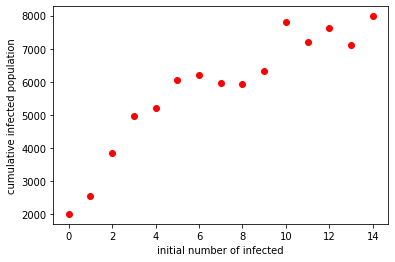

In [95]:
plot(d,c,'ro')
xlabel('initial number of infected')
ylabel('cumulative infected population')

In [ ]:
# x축은 initial number of infected population, y축은 cumulative infected population이다.
# 그래프는 초기 감염자수가 1명으로 시작하여 1명씩 늘어나는 그래프이다. 마지막의 초기 감염자수는 15명이다.
# 이또한 linear하진 않지만 대체적으로 초기 감염자수가 많을수록 총 감염자수가 늘어나는 경향을 보인다.